# Spherical pendulum

In [1]:
import numpy as np

In [2]:
var('t')
var('l g')
xy_names = [('x','x'),('y','y'),('z','z')]
uv_names = [('r','r'),('phi',r'\phi'),('theta',r'\theta')]

load('cas_utils.sage')

In [3]:
to_fun, to_var = make_symbols(xy_names,uv_names)

r  :: has been  processed
phi  :: has been  processed
theta  :: has been  processed
x  :: has been  processed
y  :: has been  processed
z  :: has been  processed


In [4]:
x2u = {x:l*sin(theta)*cos(phi),y: l*sin(theta)*sin(phi),z: l*cos(theta)}

In [5]:
transform_virtual_displacements(xy_names,uv_names,suffix='_uv')

[dtheta*l*cos(phi)*cos(theta) - dphi*l*sin(phi)*sin(theta),
 dtheta*l*cos(theta)*sin(phi) + dphi*l*cos(phi)*sin(theta),
 -dtheta*l*sin(theta)]

In [6]:
dx_uv

dtheta*l*cos(phi)*cos(theta) - dphi*l*sin(phi)*sin(theta)

In [7]:
dAlemb = (x.subs(x2u).subs(to_fun).diff(t,2))*dx_uv + \
         (y.subs(x2u).subs(to_fun).diff(t,2))*dy_uv + \
         (z.subs(x2u).subs(to_fun).diff(t,2)+g)*dz_uv  
dAlemb = dAlemb.subs(to_var)

In [8]:
show(dAlemb)

(l*thetad^2*cos(theta) + l*thetadd*sin(theta) - g)*dtheta*l*sin(theta) - (2*l*phid*thetad*cos(theta)*sin(phi) + l*phid^2*cos(phi)*sin(theta) + l*thetad^2*cos(phi)*sin(theta) - l*thetadd*cos(phi)*cos(theta) + l*phidd*sin(phi)*sin(theta))*(dtheta*l*cos(phi)*cos(theta) - dphi*l*sin(phi)*sin(theta)) + (2*l*phid*thetad*cos(phi)*cos(theta) - l*phid^2*sin(phi)*sin(theta) - l*thetad^2*sin(phi)*sin(theta) + l*thetadd*cos(theta)*sin(phi) + l*phidd*cos(phi)*sin(theta))*(dtheta*l*cos(theta)*sin(phi) + dphi*l*cos(phi)*sin(theta))

In [9]:
sol = solve(\
    [dAlemb.expand().coefficient(dtheta).trig_simplify(),\
      dAlemb.expand().coefficient(dphi).trig_simplify()],\
            [phidd,thetadd])[0]

In [10]:
show(sol)

[phidd == -2*phid*thetad*cos(theta)/sin(theta),
 thetadd == (l*phid^2*cos(theta) + g)*sin(theta)/l]

In [11]:
ode = [phid,thetad]+[s.rhs() for s in sol]
show(ode )

[phid,
 thetad,
 -2*phid*thetad*cos(theta)/sin(theta),
 (l*phid^2*cos(theta) + g)*sin(theta)/l]

[phid,
 thetad,
 -2*phid*thetad*cos(theta)/sin(theta),
 (phid^2*cos(theta) + 1)*sin(theta)]

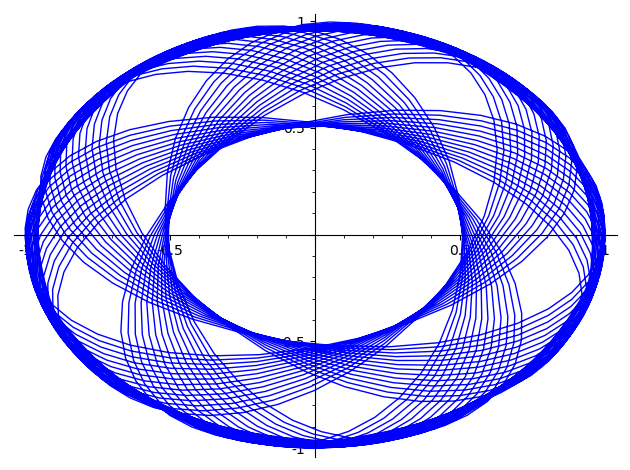

In [12]:
ode=map(lambda x:x.subs({l:1,g:1}),ode)
show(ode)
times = srange(0,237,.1)
numsol=desolve_odeint(ode,[0,pi/2-0.3,1,0],times,[phi,theta,phid,thetad])
#p=point(zip(np.fmod(numsol[:,0],(2*pi).n())-pi,numsol[:,1]),figsize=5)#,aspect_ratio=1)
p = line ( zip(np.sin(numsol[:,1])*np.cos(numsol[:,0]),np.sin(numsol[:,0])*np.sin(numsol[:,1])) )
p.show()

$$ r =\sqrt{x^2 + y^2 + z^2}$$ $$\phi=\mathrm{arctg}\frac{y}{x }$$  $$\theta=\arcsin\frac{z}{r}$$

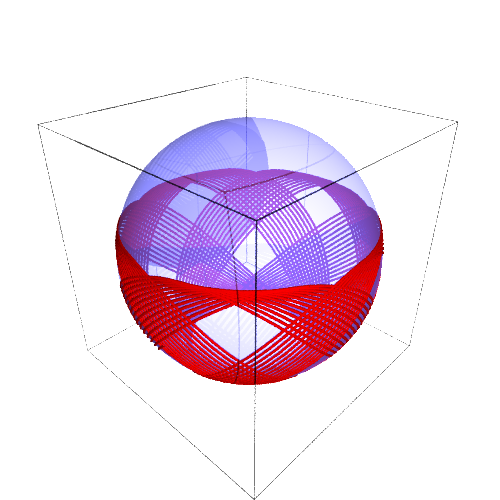

In [25]:
p3d = line3d( zip(np.sin(numsol[:,1])*np.cos(numsol[:,0]),np.sin(numsol[:,0])*np.sin(numsol[:,1]),np.cos(numsol[:,1])),thickness=2,color='red')
p3d += sphere(opacity=0.5) 
p3d.show(viewer='tachyon')

\newpage